In [5]:
import librosa
from librosa.feature import chroma_stft
import soundfile as sf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# filename = librosa.util.example_audio_file()

# import as .wav file
# filename = 'brittan_test.wav'

# load in audio file, 
# y = waveform
# sr = sample rate
# y, sr = librosa.load(filename, duration=180)


In [23]:
filename = 'brittan_test.wav'

block_gen = sf.blocks(filename, blocksize=1024)
rate = sf.info(filename).samplerate

chromas = []

for bl in block_gen:
    # downmix frame to mono (averaging out the channel dimension)
    y=np.mean(bl, axis=1)
    # compute chroma feature
    chromas.append(chroma_stft(y, sr=rate))

In [22]:
(len(chromas) * len(chromas[0]) * len(chromas[0][0]))


68436

In [23]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
print(len(y_percussive))
print(len(np.unique(y_percussive)))

print(len(y_harmonic))
print(len(np.unique(y_harmonic)))

3661824
3449810
3661824
3443315


In [24]:
(y_harmonic).max()

0.48293242

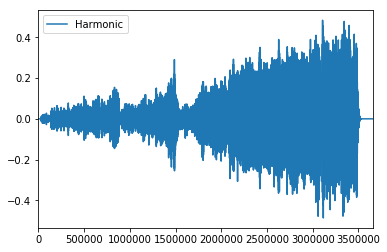

In [25]:
harmonic_df = pd.DataFrame(y_harmonic)
harmonic_df.columns = ["Harmonic"]



harmonic_df.plot()

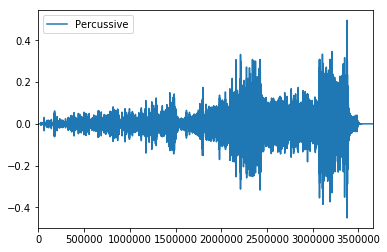

In [26]:
percussive_df = pd.DataFrame(y_percussive)
percussive_df.columns = ["Percussive"]

percussive_df.plot()

In [27]:
librosa.get_duration(y=y, sr=sr)

166.0691156462585